Index([u'userid', u'age', u'dob_day', u'dob_year', u'dob_month', u'gender',
       u'tenure', u'friend_count', u'friendships_initiated', u'likes',
       u'likes_received', u'mobile_likes', u'mobile_likes_received',
       u'www_likes', u'www_likes_received'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_lik

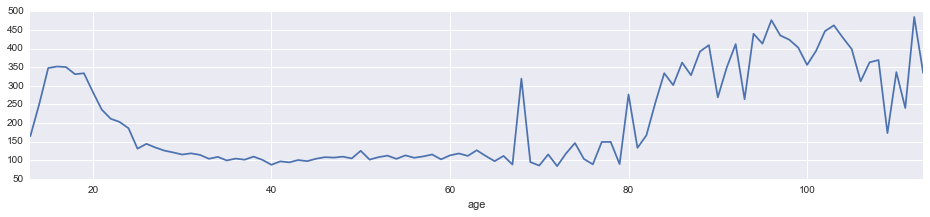

    userid  age  dob_day  dob_year  dob_month  gender  tenure  friend_count  \
0  2094382   14       19      1999         11    male     266             0   
1  1192601   14        2      1999         11  female       6             0   
2  2083884   14       16      1999         11    male      13             0   
3  1203168   14       25      1999         12  female      93             0   
4  1733186   14        4      1999         12    male      82             0   

   friendships_initiated  likes  likes_received  mobile_likes  \
0                      0      0               0             0   
1                      0      0               0             0   
2                      0      0               0             0   
3                      0      0               0             0   
4                      0      0               0             0   

   mobile_likes_received  www_likes  www_likes_received  age_with_months  
0                      0          0                   0    

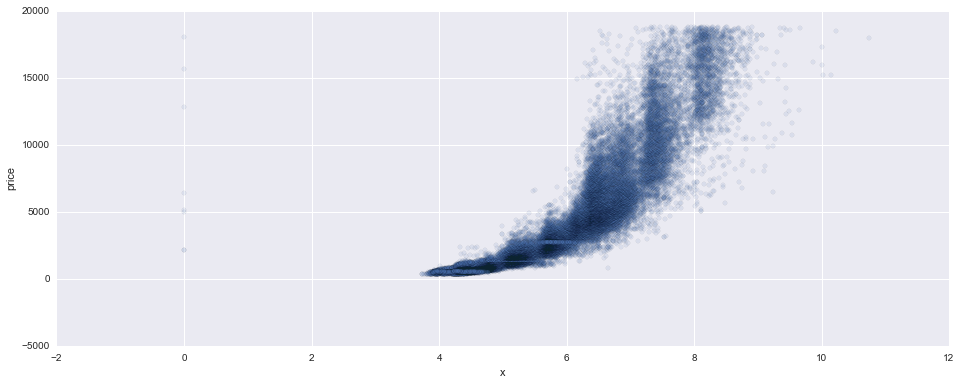

              x         y         z     price
x      1.000000  0.974701  0.970772  0.884435
y      0.974701  1.000000  0.952006  0.865421
z      0.970772  0.952006  1.000000  0.861249
price  0.884435  0.865421  0.861249  1.000000


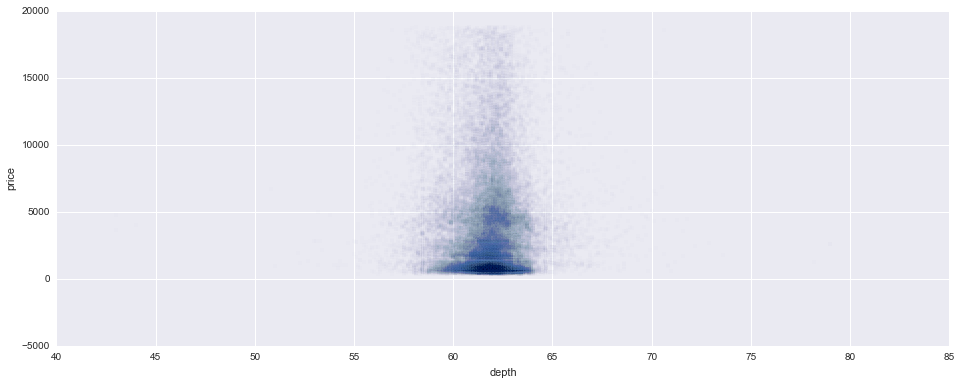

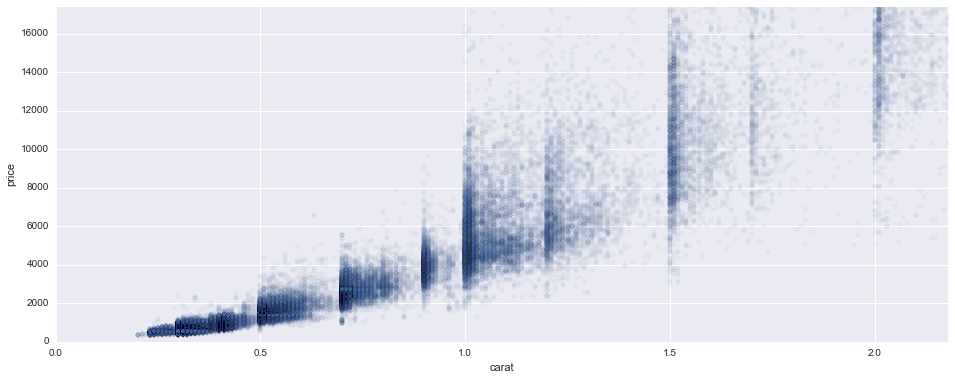

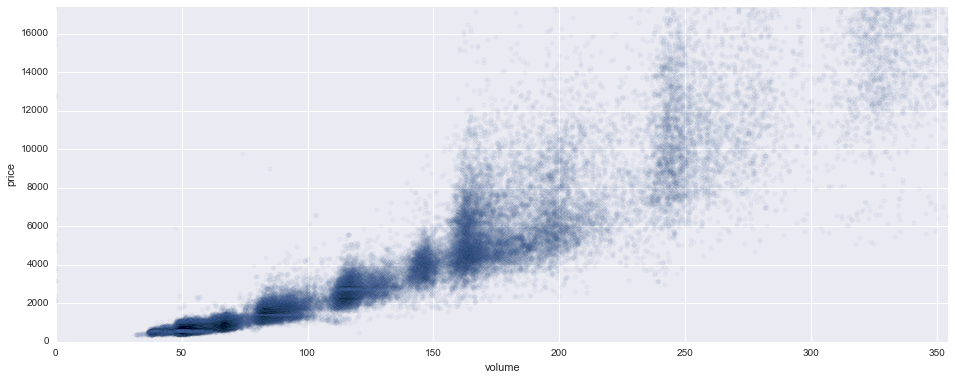

,volume,price
volume,1.000000,0.923546
price,0.923546,1.000000


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ggplot import *
from ggplot import diamonds
%matplotlib inline

df = pd.read_csv('data/pseudo_facebook.tsv', sep='\t')
print df.columns
print df.info()
print df.head()

#d = df

#d = df
#d.friend_count = d.friend_count.apply(np.sqrt)
#g = sns.jointplot("age", "friend_count", data=d, xlim=(13,90), kind="scatter", color="r", alpha=0.05)
#plt.show()

# d.friendships_initiated = d.friendships_initiated.apply(np.sqrt)
# g = sns.jointplot("age", "friendships_initiated", data=d, xlim=(13,90), kind="scatter", color="r", alpha=0.05)
# plt.show()

ag_v_fc = df.groupby('age').apply(lambda sdf: sdf['friend_count'].mean())
print ag_v_fc
ag_v_fc.plot(figsize=(16,3))
plt.show()

avg_fc = df.groupby('age').apply(lambda sdf: sdf['friend_count'].mean())
mdn_fc = df.groupby('age').apply(lambda sdf: sdf['friend_count'].median())
p10_fc = df.groupby('age').apply(lambda sdf: sdf['friend_count'].quantile(.1))
p90_fc = df.groupby('age').apply(lambda sdf: sdf['friend_count'].quantile(.9))

# print avg_fc.head()
# print mdn_fc.head()
# print p10_fc.head()
# print p90_fc.head()

# plt.hold(True)
# df.plot('age', 'friend_count', kind='scatter', alpha=0.01, ylim=((1,3000)), figsize=(16,6), logy=True)
# avg_fc.plot(figsize=(16,6), logy=True)
# mdn_fc.plot(figsize=(16,6), color='black', logy=True)
# p10_fc.plot(figsize=(16,6), color='red', logy=True)
# p90_fc.plot(figsize=(16,6), color='red', logy=True)
# plt.show()

#print (pd.Series(avg_fc.index)).corr(avg_fc)
#print df[['age','friend_count']].corr()

# df.plot('likes_received', 'www_likes_received', kind='scatter', alpha=0.2, figsize=(16,6), xlim=((0,50000)), ylim=((0,20000)))
# plt.show()

# print df[['likes_received','www_likes_received']].corr()
# print df[['likes_received','www_likes_received']].corr(method='spearman')

# g = sns.jointplot("www_likes_received", "likes_received", data=df, kind="reg", color="r",
#                   xlim=((0, df['www_likes_received'].quantile(.999))), ylim=((0, df['likes_received'].quantile(.999))))
# plt.show()

df['age_with_months'] = df['age'] + ((12.0 - df['dob_month']) / 12.0)
print df.head()

#---------------------------------------------------------------------------------------------------------------------#

df = diamonds
df.head()
print df.columns

df.plot('x', 'price', kind='scatter', figsize=(16,6), alpha=0.1)
plt.show()
print df[['x','y','z','price']].corr()

df.plot('depth', 'price', kind='scatter', figsize=(16,6), alpha=0.01)
plt.show()

df[['depth','price']].corr()

df.plot('carat', 'price', kind='scatter', figsize=(16,6), alpha=0.05,
        xlim=((0,df['carat'].quantile(.99))), ylim=((0,df['price'].quantile(.99))))
plt.show()

df['volume'] = df['x'] * df['y'] * df['z']
df.plot('volume', 'price', kind='scatter', figsize=(16,6), alpha=0.05,
        xlim=((0,df['volume'].quantile(.99))), ylim=((0,df['price'].quantile(.99))))
plt.show()

df[(df['volume'] > 0) & (df['volume'] < 800)][['volume','price']].corr()